# Figure2 plotting

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import collections

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

from datetime import date
today = str(date.today())

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')


results = './write/'

In [2]:
general_mrkrs = [ 'MYH7', 'TNNT1', 'TNNT3', 'MYH1', 'MYH2', "CKM", "MB", # Myofibers
           'PAX7', 'DLK1', # MuSCs
           'PDGFRA', 'DCN', 'ANGPTL7', 'OSR2', 'NGFR', 'SLC22A3','ITGA6', # Fibroblasts
           'FMOD', 'TNMD' ,  'MKX', # Tenocytes
 'MPZ', 'MBP',  # Schwann cells
'CDH2', 'L1CAM', # SCG
'MSLN', 'ITLN1', # mesothelium
"ADIPOQ", "PLIN1", # adipocytes
'PTPRC', 'CD3D', 'IL7R', # T cells
'NKG7', 'PRF1', #NK cells
'CD79A', "TCL1A",  # B cells
'MZB1', 'JCHAIN', # B plasma 
"CD14", "FCGR3A",'S100A8', 'S100A12', # Mono
"CD163", "C1QA", # Macrop
"XCR1", "CLEC9A", # cDC1 "CADM1",
"CD1C", "CLEC10A", "CCR7", # cDC2
'LILRA4', 'IL3RA', "IRF7",  # pDC 
'FCGR3B', 'CSF3R', 'SORL1',  # Neutrophils
'EPX', 'PRG2', # Eosinophils 'CLC'
'TPSB2', 'MS4A2', # Mast cells
'PECAM1', 'HEY1','CLU', # art EC
'CA4', 'LPL', # capEC
'ACKR1', 'SELE', # venEC
'LYVE1', 'TFF3',  # lymphEC
'RGS5','ABCC9', # pericytes           
'MYH11', 'ACTA2', # SMC
'HBA1', #RBC
    ]

In [40]:
adata_sc = sc.read(f'{results}/ICM_scell_dbrm_scvi_v2_2023-03-06.h5ad')

In [41]:
adata_scvi_MuSC = sc.read('./write/ICM_result/MuSC_cells_scvi/adata.h5ad')

In [6]:
adata = adata_sc[adata_scvi_MuSC.obs.index]

In [7]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe

In [8]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=10000, layer="counts",batch_key='Age_group', subset = True)

scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key='DonorID')

vae = scvi.model.SCVI(adata,n_latent=30, n_layers=2)
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [15:05<00:00,  2.20s/it, loss=1.84e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [15:05<00:00,  2.26s/it, loss=1.84e+03, v_num=1]


In [3]:
adata

AnnData object with n_obs × n_vars = 17554 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std', 'highly_va

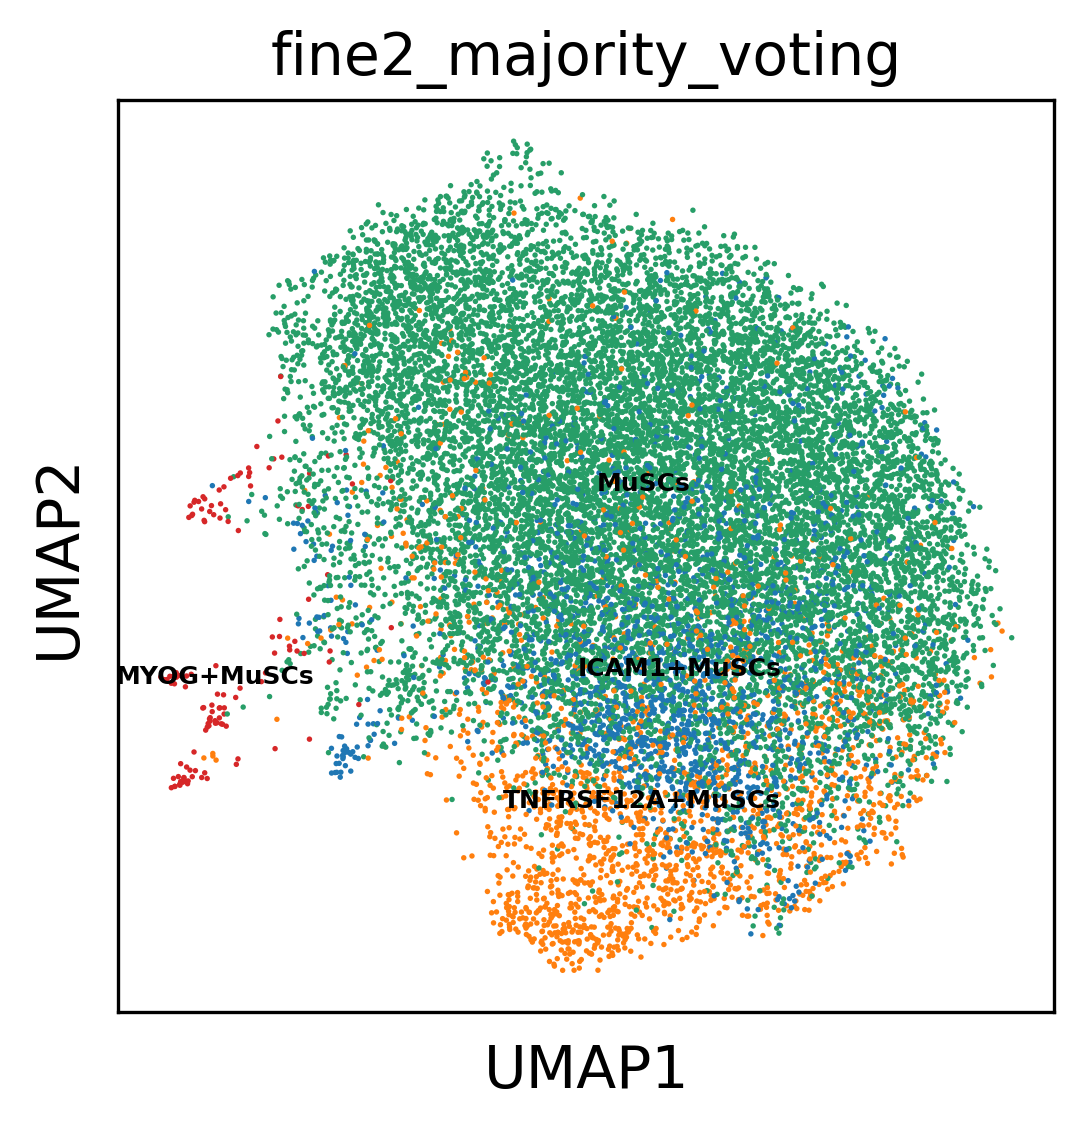

In [47]:
sc.pl.umap(adata, color = ['fine2_majority_voting',],legend_loc='on data',legend_fontsize=6,save='ICM_MuSC_scvi_v2_anno.pdf')

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


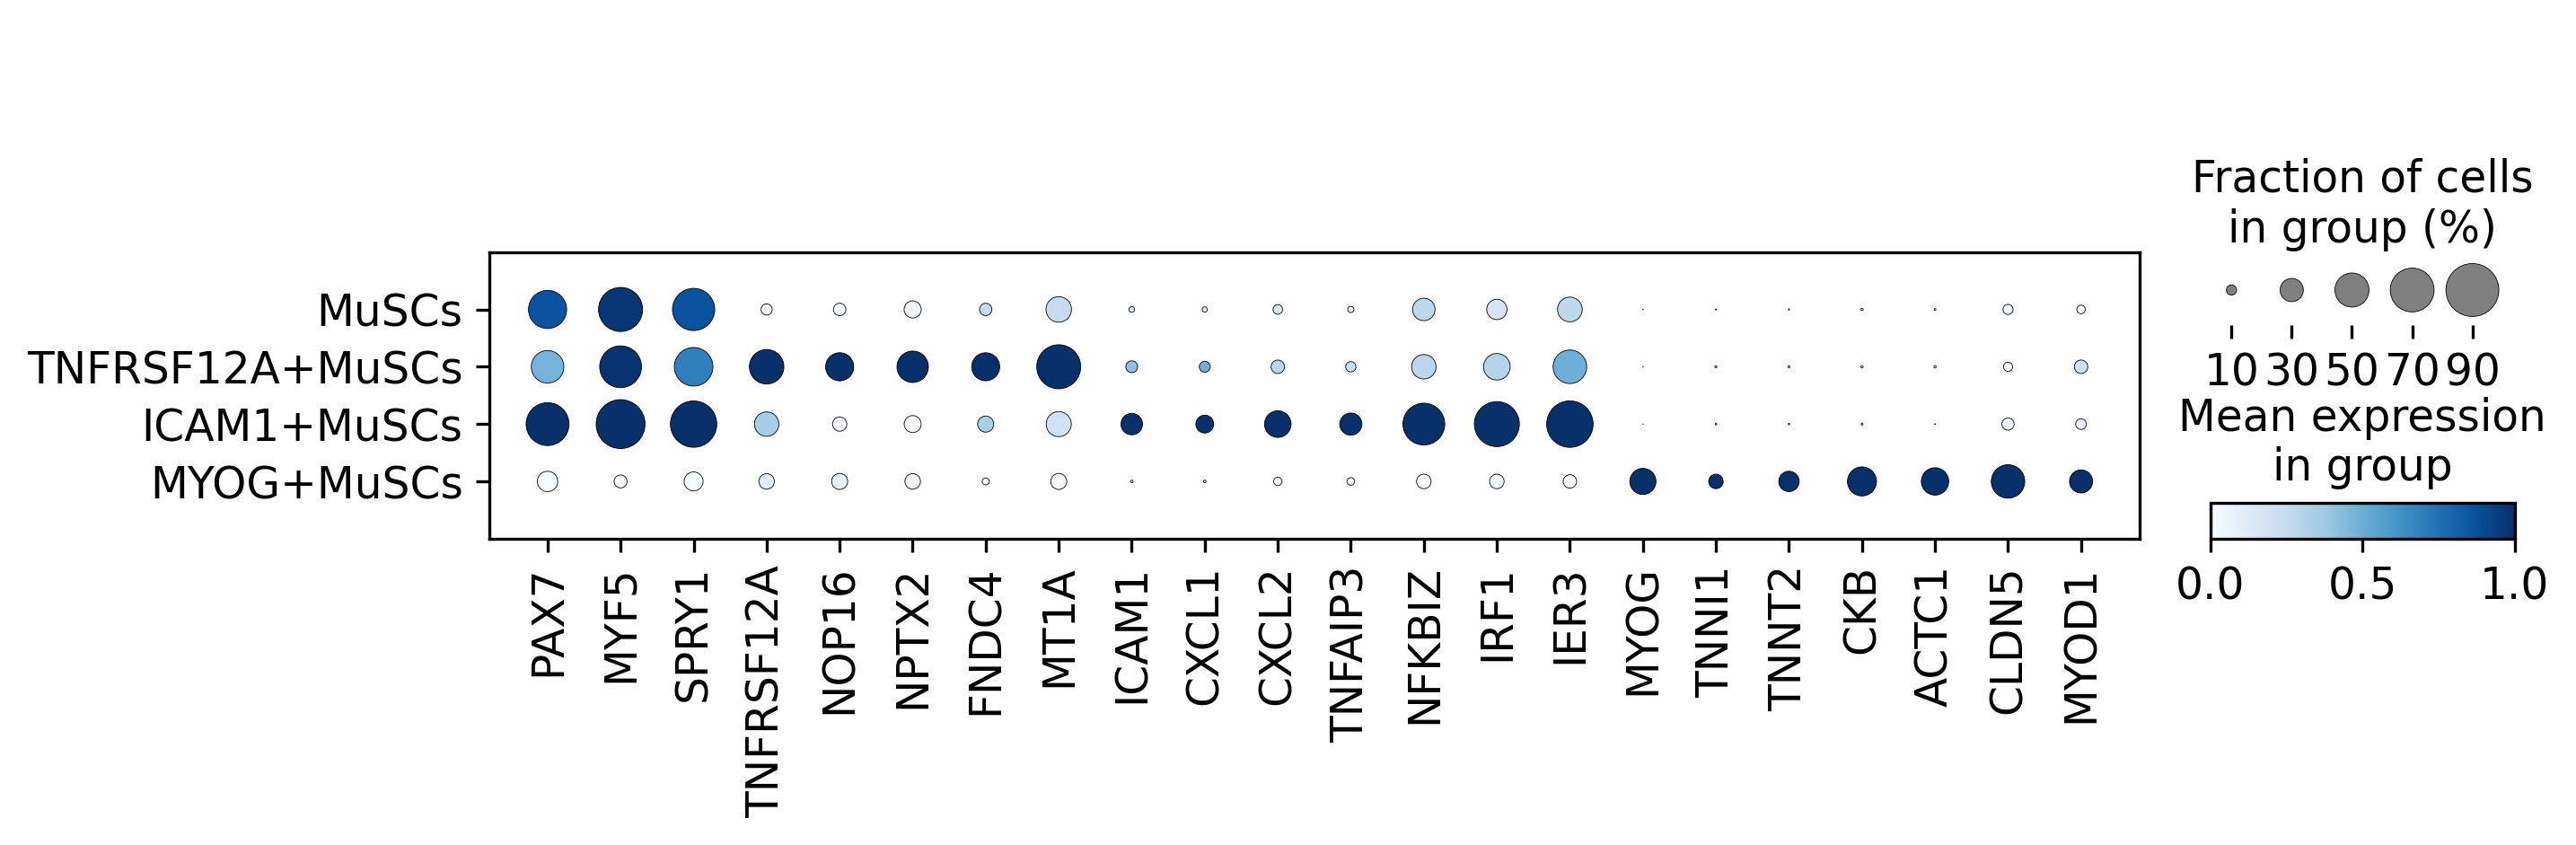

In [27]:
sc.pl.dotplot(adata,['PAX7','MYF5','SPRY1','TNFRSF12A','NOP16','NPTX2','FNDC4','MT1A','ICAM1','CXCL1','CXCL2','TNFAIP3','NFKBIZ','IRF1','IER3','MYOG','TNNI1','TNNT2','CKB','ACTC1','CLDN5','MYOD1'],groupby='fine2_majority_voting',categories_order=['MuSCs','TNFRSF12A+MuSCs','ICAM1+MuSCs','MYOG+MuSCs',],cmap='Blues',standard_scale='var',
         save='ICM_MuSC_scvi_v2_markar_blue.pdf')

In [117]:
adata_ICAM1 = adata[adata.obs['fine2_majority_voting']=='ICAM1+MuSCs']

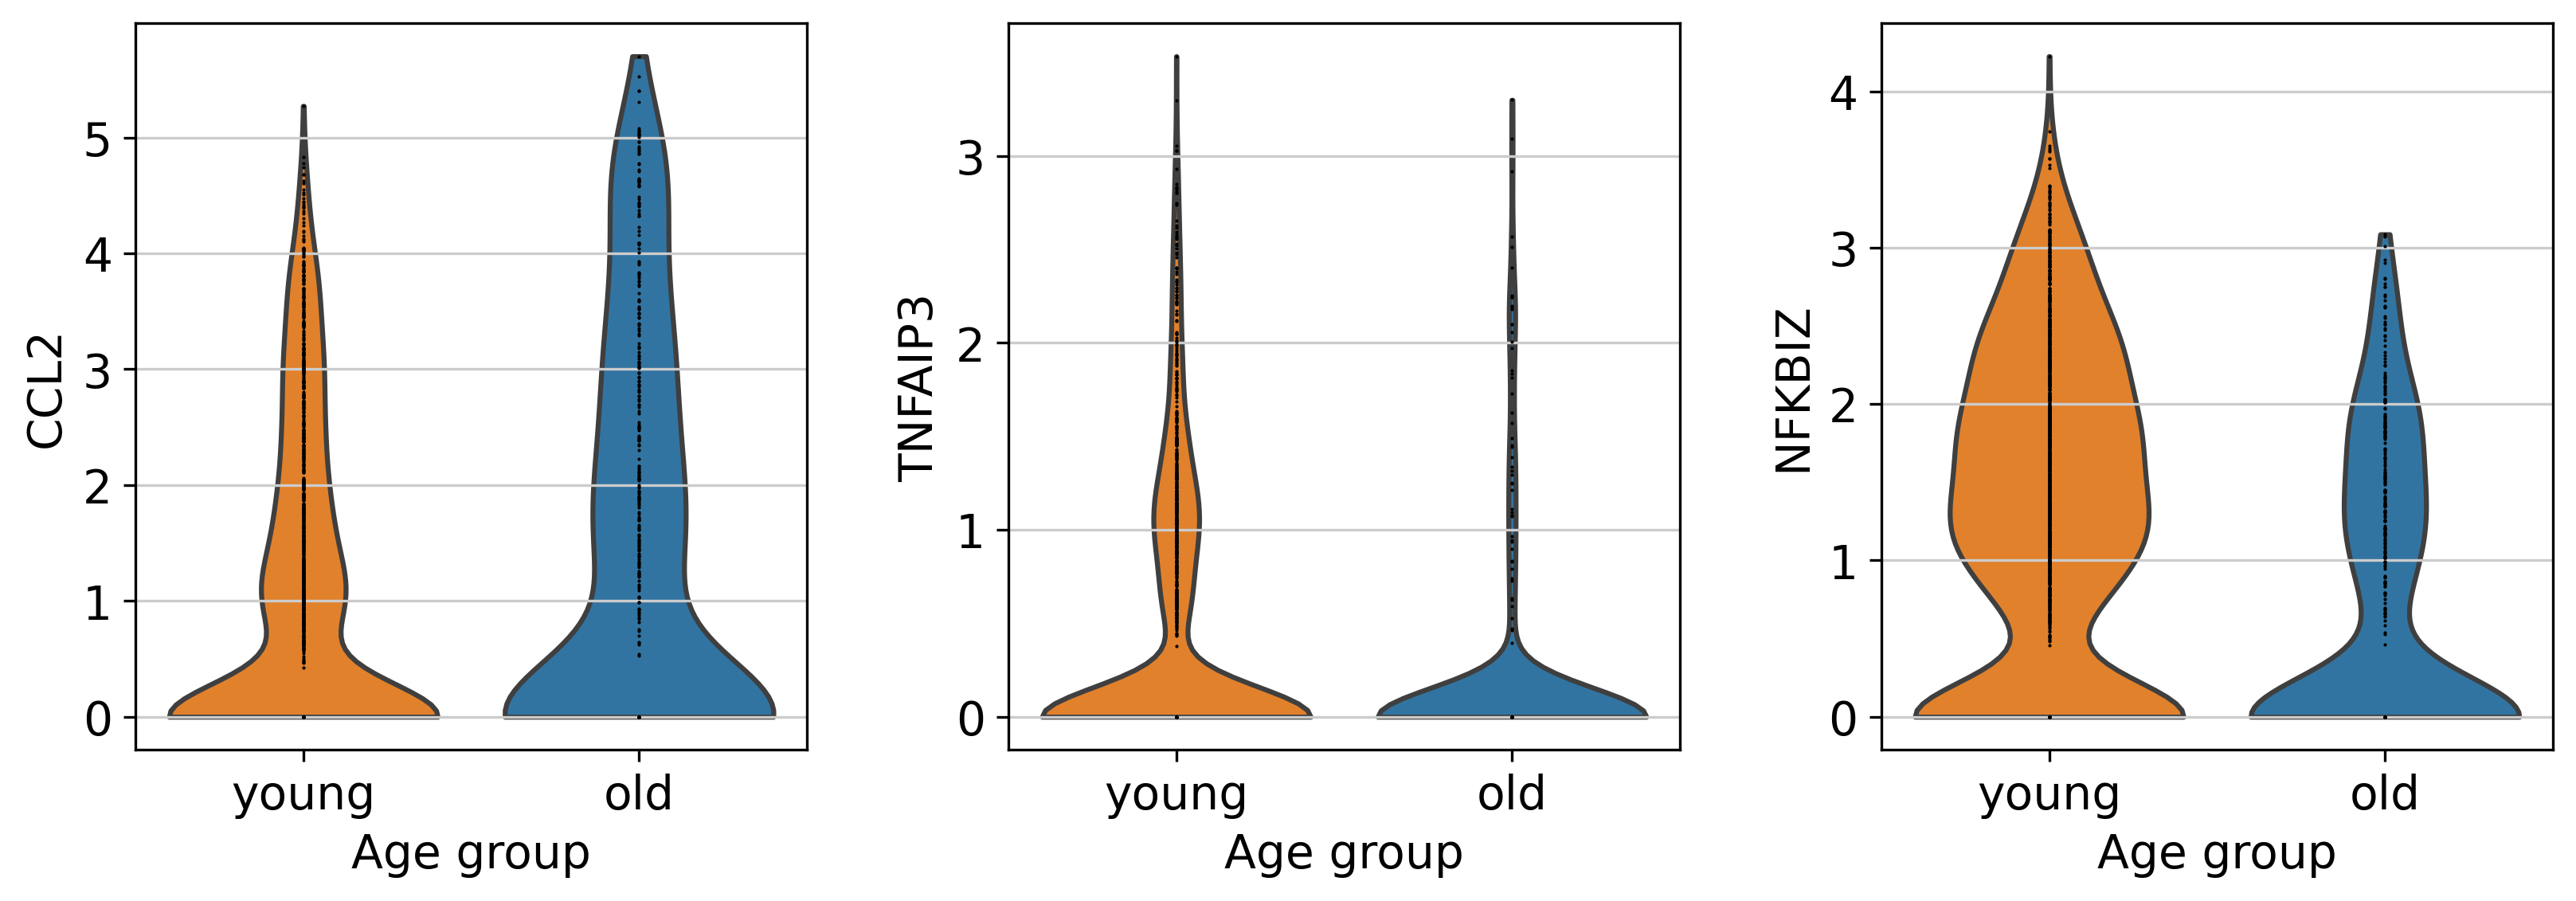

In [56]:
sc.pl.violin(adata_ICAM1,['CCL2','TNFAIP3','NFKBIZ'],groupby='Age_group',
             order=['young','old',],jitter=False,save='ICM_MuSC_scvi_v2_CCL2.pdf')

In [123]:
adata_ICAM1_young = adata_ICAM1[adata_ICAM1.obs['Age_group']=='young']
adata_ICAM1_old = adata_ICAM1[adata_ICAM1.obs['Age_group']=='old']

In [128]:
CCL2_exp_young = adata_ICAM1_young[:,'CCL2'].X.todense()
CCL2_exp_old = adata_ICAM1_old[:,'CCL2'].X.todense()

TNFAIP3_exp_young = adata_ICAM1_young[:,'TNFAIP3'].X.todense()
TNFAIP3_exp_old = adata_ICAM1_old[:,'TNFAIP3'].X.todense()

NFKBIZ_exp_young = adata_ICAM1_young[:,'NFKBIZ'].X.todense()
NFKBIZ_exp_old = adata_ICAM1_old[:,'NFKBIZ'].X.todense()

CCL2_exp_young.shape = (1,1489)
CCL2_exp_old.shape = (1,481)
TNFAIP3_exp_young.shape = (1,1489)
TNFAIP3_exp_old.shape = (1,481)
NFKBIZ_exp_young.shape = (1,1489)
NFKBIZ_exp_old.shape = (1,481)

In [131]:
from scipy import stats

In [132]:
stats.ttest_ind(list(np.array(CCL2_exp_young)[0]),list(np.array(CCL2_exp_old)[0]))

Ttest_indResult(statistic=-5.728778812174615, pvalue=1.167640299027185e-08)

In [133]:
stats.ttest_ind(list(np.array(TNFAIP3_exp_young)[0]),list(np.array(TNFAIP3_exp_old)[0]))

Ttest_indResult(statistic=7.53818827451712, pvalue=7.22808010061258e-14)

In [134]:
stats.ttest_ind(list(np.array(NFKBIZ_exp_young)[0]),list(np.array(NFKBIZ_exp_old)[0]))

Ttest_indResult(statistic=11.267152764598698, pvalue=1.4007473317296908e-28)

***
marker genes

In [5]:
adata

AnnData object with n_obs × n_vars = 17554 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std', 'highly_va

In [6]:
adata.uns['log1p']["base"] = None

In [7]:
sc.tl.rank_genes_groups(adata, 'fine2_majority_voting',method='t-test',corr_method='benjamini-hochberg')

In [8]:
adata

AnnData object with n_obs × n_vars = 17554 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std', 'highly_va

In [9]:
pd.DataFrame(adata.uns['rank_genes_groups']['names'])

,ICAM1+MuSCs,MYOG+MuSCs,MuSCs,TNFRSF12A+MuSCs
0,EGR1,TUBA1B,TSC22D3,MT2A
1,DNAJB1,PFN1,DDIT4,NNMT
2,JUN,TMSB4X,CIRBP,NAMPT
3,JUNB,STMN1,TSC22D1,IFITM3
4,IER2,RAN,NDRG2,MT1A
...,...,...,...,...
33533,RPL41,WISP2,DDX5,CIRBP
33534,DDIT4,PRELP,SOCS3,JUN
33535,RPL39,GALNT15,UGCG,NDRG2
33536,MT1X,CXXC4,NAMPT,TRDN


In [12]:
# keep marker gene list
with pd.ExcelWriter('./write/marker_gene/human_MuSC_marker.xlsx') as writer:
    for cell_type_name in list(collections.Counter(adata.obs['fine2_majority_voting'])):
        celltype_list = []
        gene_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        score_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['scores'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        logfc_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        pvals_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['pvals'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        padj_list = list(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name][np.array(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        celltype_list = [cell_type_name]*len(gene_list)
        #result_df = pd.DataFrame({'Celltype':celltype_list,'Gene':gene_list,'Scores':score_list,'Logfoldchanges':logfc_list,'Pvals':pvals_list,'Pvals_adj':padj_list})
        result_df = pd.DataFrame({'Gene':gene_list,'Pvals':pvals_list,'Pvals_adj':padj_list,'Logfoldchanges':logfc_list})
        filename = cell_type_name
        result_df.to_excel(writer,sheet_name=filename,index=False)

***
ribosome biogenesis fraction

In [4]:
collections.Counter(adata.obs['fine2_majority_voting'])

Counter({'MYOG+MuSCs': 131,
         'MuSCs': 13551,
         'TNFRSF12A+MuSCs': 1902,
         'ICAM1+MuSCs': 1970})

In [7]:
adata_CD54 = adata[adata.obs['fine2_majority_voting']=='ICAM1+MuSCs']
adata_main = adata[adata.obs['fine2_majority_voting']=='MuSCs']
adata_MYOG = adata[adata.obs['fine2_majority_voting']=='MYOG+MuSCs']
adata_TNFR = adata[adata.obs['fine2_majority_voting']=='TNFRSF12A+MuSCs']

In [11]:
collections.Counter(adata_main.obs['Age_group'])
collections.Counter(adata_CD54.obs['Age_group'])
collections.Counter(adata_TNFR.obs['Age_group'])
collections.Counter(adata_MYOG.obs['Age_group'])

Counter({'old': 5090, 'young': 8461})

Counter({'old': 481, 'young': 1489})

Counter({'old': 857, 'young': 1045})

Counter({'old': 61, 'young': 70})

In [34]:
ribosome_gene_list = ['POLR1A','POLR1B','POLR1C','POLR1D','RPA3','POLR1E','WDR74','WDR3','MRTO4','EBNA1BP2','RRS1','RRP1','RRP9','BRIX1','IMP4','UTP3','NOP56','NOP58','DCAF13','NOB1','MPHOSPH10','GAR1','DDX21','NIP7','SURF6','SNRPB']

fraction_main_MuSC = []
for i in ribosome_gene_list:
    fraction_main_MuSC.append(adata_main[adata_main.obs['Age_group']=='old'].raw[:,i].X.size/5090)

fraction_CD54_MuSC = []
for i in ribosome_gene_list:
    fraction_CD54_MuSC.append(adata_CD54[adata_CD54.obs['Age_group']=='old'].raw[:,i].X.size/481)

fraction_TNFR_MuSC = []
for i in ribosome_gene_list:
    fraction_TNFR_MuSC.append(adata_TNFR[adata_TNFR.obs['Age_group']=='old'].raw[:,i].X.size/857)

fraction_MYOG_MuSC = []
for i in ribosome_gene_list:
    fraction_MYOG_MuSC.append(adata_MYOG[adata_MYOG.obs['Age_group']=='old'].raw[:,i].X.size/61)

fraction = fraction_main_MuSC+fraction_CD54_MuSC+fraction_TNFR_MuSC+fraction_MYOG_MuSC
gene = ['POLR1A','POLR1B','POLR1C','POLR1D','RPA3','POLR1E','WDR74','WDR3','MRTO4','EBNA1BP2','RRS1','RRP1','RRP9','BRIX1','IMP4','UTP3','NOP56','NOP58','DCAF13','NOB1','MPHOSPH10','GAR1','DDX21','NIP7','SURF6','SNRPB']*4
celltype = ['MuSCs']*len(ribosome_gene_list)+['ICAM1+MuSCs']*len(ribosome_gene_list)+['TNFRSF12A+MuSCs']*len(ribosome_gene_list)+['MYOG+MuSCs']*len(ribosome_gene_list)

fraction_df = pd.DataFrame({'gene' : gene,'fraction':fraction,'cell_type':celltype})
fraction_df

fraction_df.to_csv('./write/ICM_MuSC_scvi_v2_ribosome_biogenesis_fraction.csv')

,gene,fraction,cell_type
0,POLR1A,0.061886,MuSCs
1,POLR1B,0.018861,MuSCs
2,POLR1C,0.051866,MuSCs
3,POLR1D,0.384872,MuSCs
4,RPA3,0.114145,MuSCs
...,...,...,...
99,GAR1,0.213115,MYOG+MuSCs
100,DDX21,0.442623,MYOG+MuSCs
101,NIP7,0.098361,MYOG+MuSCs
102,SURF6,0.114754,MYOG+MuSCs


***
ribosome biogenesis score

In [9]:
ribosome_biogenesis_gene = ['AATF','ABCE1','ABT1','BMS1','BOP1','BRIX1','BYSL','C1D','C1QBP','CHD7','CUL4A','CUL4B','DCAF13','DDX10','DDX17','DDX18','DDX21','DDX27','DDX28','DDX31','DDX3X','DDX47','DDX49','DDX51','DDX52','DDX54','DDX56','DHX29','DHX30','DHX37','DIMT1','DIS3','DKC1','DROSHA','EBNA1BP2','EIF2A','EIF4A3','EIF6','EMG1','ERAL1','ERCC2','ERI1','ERI2','ERI3','ESF1','EXOSC1','EXOSC10','EXOSC2','EXOSC3','EXOSC4','EXOSC5','EXOSC6','EXOSC7','EXOSC8','EXOSC9','FASTKD2','FBL','FBLL1','FCF1','FDXACB1','FRG1','FTSJ3','GAR1','GEMIN4','GLUL','GNL2','GNL3L','GPATCH4','GTF2H5','GTF3A','GTPBP10','GTPBP4','HEATR1','HEATR3','HELB','HELQ','IMP3','IMP4','ISG20','ISG20L2','KAT2B','KRI1','KRR1','LAS1L','LSG1','LSM6','LTV1','LYAR','MAK16','MALSU1','MDN1','METTL15','METTL16','METTL17','METTL18','METTL5','MPHOSPH10','MPHOSPH6','MPV17L2','MRM1','MRPL1','MRPL20','MRPL22','MRPL36','MRPS11','MRPS2','MRPS7','MRTO4','MTERF3','MTERF4','MTG2','MYBBP1A','NAF1','NAT10','NGDN','NGRN','NHP2','NIFK','NIP7','NLE1','NMD3','NOB1','NOC2L','NOC4L','NOL10','NOL11','NOL6','NOL8','NOL9','NOLC1','NOM1','NOP10','NOP14','NOP16','NOP2','NOP56','NOP58','NOP9','NPM1','NPM3','NSA2','NSUN3','NSUN4','NSUN5','NUDT16','NUP88','NVL','PA2G4','PAK1IP1','PDCD11','PES1','PIH1D1','PIH1D2','PIN4','PINX1','POP4','POP5','POP7','PPAN','PRKDC','PTEN','PWP1','PWP2','RAN','RBFA','RCL1','REXO4','RIOK1','RIOK2','RIOK3','RMRP','RNASEL','RPF1','RPF2','RPL10','RPL10A','RPL10L','RPL11','RPL14','RPL23A','RPL24','RPL26','RPL26L1','RPL27','RPL3','RPL35','RPL35A','RPL38','RPL3L','RPL5','RPL6','RPL7','RPL7A','RPL7L1','RPLP0','RPP25','RPP30','RPP38','RPP40','RPS14','RPS15','RPS16','RPS17','RPS19','RPS21','RPS24','RPS25','RPS27','RPS27L','RPS28','RPS5','RPS6','RPS7','RPS8','RPSA','RPUSD1','RPUSD2','RPUSD3','RPUSD4','RRN3','RRP1','RRP12','RRP15','RRP1B','RRP36','RRP7A','RRP8','RRP9','RRS1','RSL1D1','RSL24D1','SART1','SBDS','SDAD1','SHQ1','SIRT7','SNU13','SRFBP1','SURF6','SUV39H1','TBL3','TFB1M','TFB2M','TRAF7','TRMT112','TRMT61B','TSC1','TSR1','TSR2','TSR3','URB1','URB2','USP36','UTP14A','UTP14C','UTP15','UTP18','UTP20','UTP23','UTP3','UTP4','UTP6','VCX','WBP11','WDR12','WDR18','WDR3','WDR36','WDR43','WDR46','WDR55','WDR74','WDR75','XPO1','XRCC5','XRN2','YBEY','YTHDF2','ZCCHC4','ZNF622','ZNF658','ZNHIT3','ZNHIT6',]
sc.tl.score_genes(adata,ribosome_biogenesis_gene)

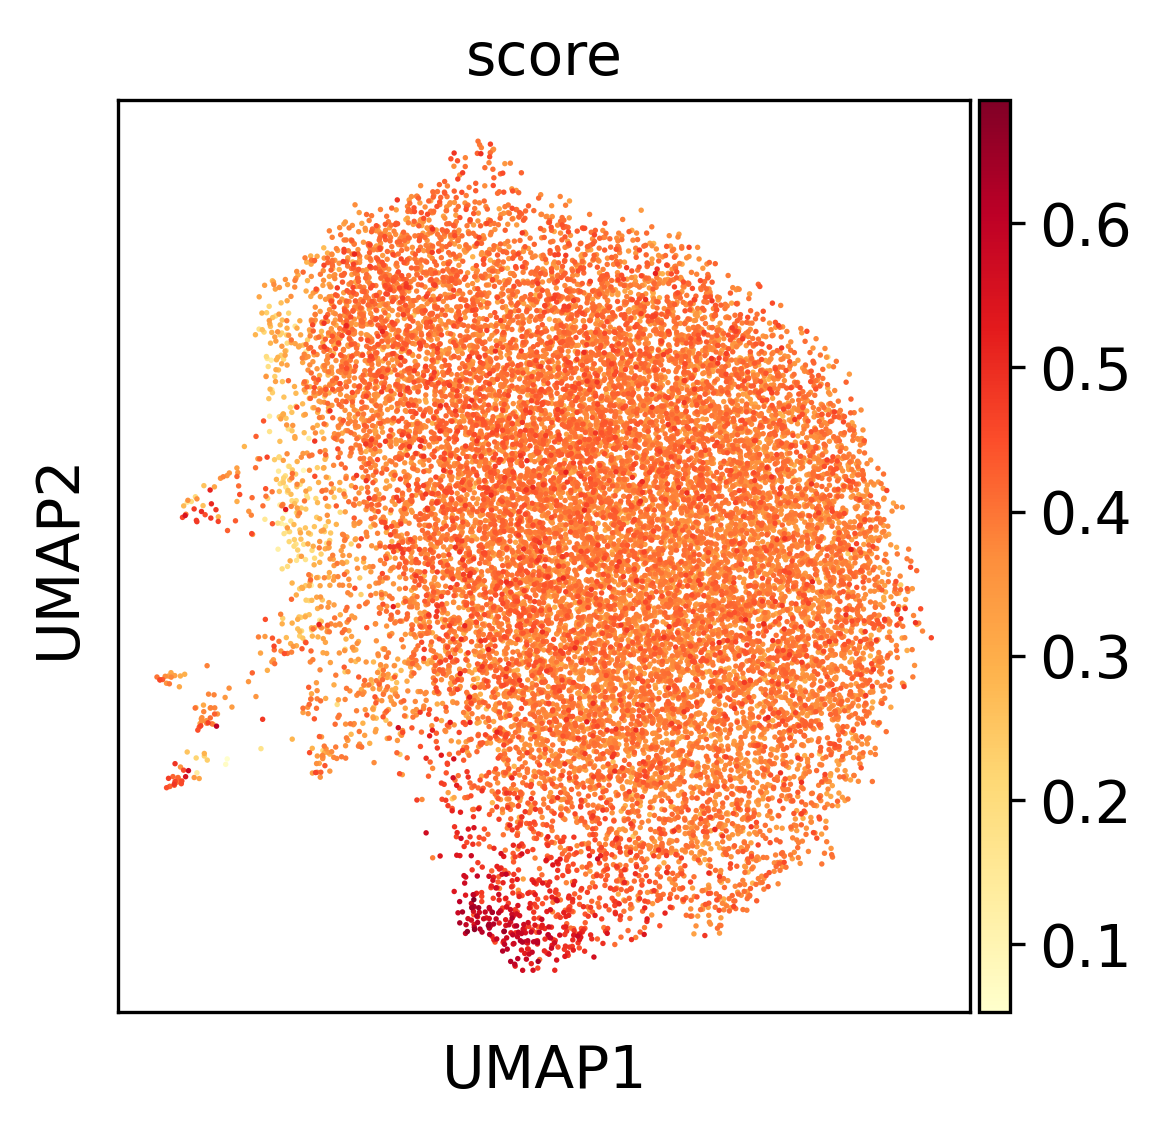

In [10]:
sc.pl.umap(adata,color=['score'],color_map='YlOrRd')

***
Moli file

In [43]:
#
adata_sc = sc.read(f'{results}/ICM_scell_dbrm_scvi_v2_2023-03-06.h5ad')

In [51]:
# 
adata_diet = sc.AnnData(X = adata_sc[adata.obs.index].X, obs = adata.obs, var = adata.raw.var, obsm = adata.obsm, obsp=adata.obsp)
adata_diet

AnnData object with n_obs × n_vars = 17554 × 33538
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std'
    obsm: '

In [52]:
del adata_diet.obsm[ '_scvi_extra_categoricals']
del adata_diet.obsm['_scvi_extra_continuous']
del adata_diet.obsp

In [53]:
Age_bin = []
for i in list(adata_diet.obs['Age_group']):
    if i == 'young':
        Age_bin.append('1Young')
    elif i == 'old':
        Age_bin.append('2Aged')
    else: print(i)

adata_diet.obs['Age_bin'] = Age_bin

In [54]:
adata_diet.write_loom('/public/LiuTL/Rstudio/skeletal_muscle/moli_v2/data/human_SKM_v2.0_MuSC_scVI-analysis_adata_diet.loom',write_obsm_varm=True)
adata_diet.obs.to_csv('/public/LiuTL/Rstudio/skeletal_muscle/moli_v2/data/human_SKM_v2.0_MuSC_scVI-analysis_adata_diet_obs.csv')
adata_diet.var.to_csv('/public/LiuTL/Rstudio/skeletal_muscle/moli_v2/data/human_SKM_v2.0_MuSC_scVI-analysis_adata_diet_var.csv')